In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Load AutoReg class from statsmodels.tsa.ar_model module
#
from statsmodels.tsa.ar_model import AutoReg

/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load data + preparing data for modelling

In [2]:
acc = pd.read_csv('220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv')
acc.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [68]:
acc.AUSPRAEGUNG.value_counts()

insgesamt                 894
Verletzte und Getötete    894
mit Personenschäden       298
Name: AUSPRAEGUNG, dtype: int64

In [3]:
acc1 = acc[acc.WERT.notna()]

In [4]:
acc1 = acc1[acc1.MONAT != 'Summe']

In [5]:
acc1['MONTH'] = pd.to_datetime(acc1['MONAT'], format='%Y%m')
acc1

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,MONTH
13,Alkoholunfälle,insgesamt,2021,202101,16.0,28.0,23.08,-42.86,35.0,2021-01-01
14,Alkoholunfälle,insgesamt,2021,202102,14.0,40.0,-12.50,-65.00,33.0,2021-02-01
15,Alkoholunfälle,insgesamt,2021,202103,24.0,27.0,71.43,-11.11,32.0,2021-03-01
16,Alkoholunfälle,insgesamt,2021,202104,16.0,26.0,-33.33,-38.46,32.0,2021-04-01
17,Alkoholunfälle,insgesamt,2021,202105,24.0,40.0,50.00,-40.00,30.0,2021-05-01
...,...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0,2000-08-01
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0,2000-09-01
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0,2000-10-01
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0,2000-11-01


## Prepare data for total Alkoholunfälle accidents

In [6]:
df = acc1[(acc1.MONATSZAHL == 'Alkoholunfälle') & (acc1.AUSPRAEGUNG == 'insgesamt')]
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,MONTH
13,Alkoholunfälle,insgesamt,2021,202101,16.0,28.0,23.08,-42.86,35.0,2021-01-01
14,Alkoholunfälle,insgesamt,2021,202102,14.0,40.0,-12.50,-65.00,33.0,2021-02-01
15,Alkoholunfälle,insgesamt,2021,202103,24.0,27.0,71.43,-11.11,32.0,2021-03-01
16,Alkoholunfälle,insgesamt,2021,202104,16.0,26.0,-33.33,-38.46,32.0,2021-04-01
17,Alkoholunfälle,insgesamt,2021,202105,24.0,40.0,50.00,-40.00,30.0,2021-05-01
...,...,...,...,...,...,...,...,...,...,...
293,Alkoholunfälle,insgesamt,2000,200008,77.0,NaN,-22.22,NaN,76.0,2000-08-01
294,Alkoholunfälle,insgesamt,2000,200009,84.0,NaN,9.09,NaN,77.0,2000-09-01
295,Alkoholunfälle,insgesamt,2000,200010,83.0,NaN,-1.19,NaN,78.0,2000-10-01
296,Alkoholunfälle,insgesamt,2000,200011,71.0,NaN,-14.46,NaN,77.0,2000-11-01


In [7]:
df.sort_values('MONTH', inplace=True)
df

/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,MONTH
286,Alkoholunfälle,insgesamt,2000,200001,78.0,NaN,NaN,NaN,78.0,2000-01-01
287,Alkoholunfälle,insgesamt,2000,200002,53.0,NaN,-32.05,NaN,66.0,2000-02-01
288,Alkoholunfälle,insgesamt,2000,200003,73.0,NaN,37.74,NaN,68.0,2000-03-01
289,Alkoholunfälle,insgesamt,2000,200004,78.0,NaN,6.85,NaN,71.0,2000-04-01
290,Alkoholunfälle,insgesamt,2000,200005,96.0,NaN,23.08,NaN,76.0,2000-05-01
...,...,...,...,...,...,...,...,...,...,...
20,Alkoholunfälle,insgesamt,2021,202108,46.0,46.0,4.55,0.00,29.0,2021-08-01
21,Alkoholunfälle,insgesamt,2021,202109,54.0,46.0,17.39,17.39,30.0,2021-09-01
22,Alkoholunfälle,insgesamt,2021,202110,43.0,34.0,-20.37,26.47,30.0,2021-10-01
23,Alkoholunfälle,insgesamt,2021,202111,33.0,23.0,-23.26,43.48,31.0,2021-11-01


In [8]:
df.reset_index(drop=True, inplace=True)
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,MONTH
0,Alkoholunfälle,insgesamt,2000,200001,78.0,NaN,NaN,NaN,78.0,2000-01-01
1,Alkoholunfälle,insgesamt,2000,200002,53.0,NaN,-32.05,NaN,66.0,2000-02-01
2,Alkoholunfälle,insgesamt,2000,200003,73.0,NaN,37.74,NaN,68.0,2000-03-01
3,Alkoholunfälle,insgesamt,2000,200004,78.0,NaN,6.85,NaN,71.0,2000-04-01
4,Alkoholunfälle,insgesamt,2000,200005,96.0,NaN,23.08,NaN,76.0,2000-05-01
...,...,...,...,...,...,...,...,...,...,...
259,Alkoholunfälle,insgesamt,2021,202108,46.0,46.0,4.55,0.00,29.0,2021-08-01
260,Alkoholunfälle,insgesamt,2021,202109,54.0,46.0,17.39,17.39,30.0,2021-09-01
261,Alkoholunfälle,insgesamt,2021,202110,43.0,34.0,-20.37,26.47,30.0,2021-10-01
262,Alkoholunfälle,insgesamt,2021,202111,33.0,23.0,-23.26,43.48,31.0,2021-11-01


# Modelling
- With the time series data, I decided to try Auto Regression, Auto Regression Moving Average, and Fb's time series library Prophet

## Test stationary
- Test for stationary over time-series data

In [25]:
#
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
#
df_stationarityTest = adfuller(df['WERT'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])

P-value:  0.07835181181047786


/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


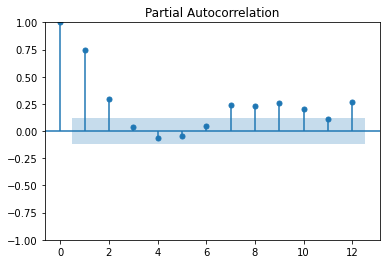

In [26]:
# Try find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['WERT'], lags=12)

/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


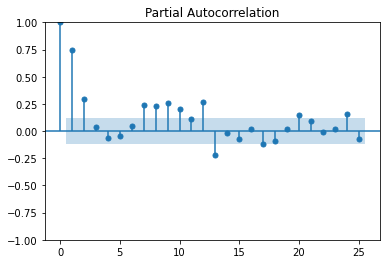

In [27]:
pacf = plot_pacf(df['WERT'], lags=25)

## Auto regression model

### Training

In [159]:
df.tail()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,MONTH
259,Alkoholunfälle,insgesamt,2021,202108,46.0,46.0,4.55,0.00,29.0,2021-08-01
260,Alkoholunfälle,insgesamt,2021,202109,54.0,46.0,17.39,17.39,30.0,2021-09-01
261,Alkoholunfälle,insgesamt,2021,202110,43.0,34.0,-20.37,26.47,30.0,2021-10-01
262,Alkoholunfälle,insgesamt,2021,202111,33.0,23.0,-23.26,43.48,31.0,2021-11-01
263,Alkoholunfälle,insgesamt,2021,202112,21.0,13.0,-36.36,61.54,32.0,2021-12-01


In [207]:
#
# Create training and test data
#
train_data = df['WERT'][:len(df)-12:]
test_data = df['WERT'][len(df)-12:]

In [217]:
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=12).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   WERT   No. Observations:                  252
Model:                    AutoReg(12)   Log Likelihood                -852.752
Method:               Conditional MLE   S.D. of innovations              8.450
Date:                Wed, 13 Jul 2022   AIC                           1733.505
Time:                        09:02:08   BIC                           1782.234
Sample:                            12   HQIC                          1753.139
                                  252                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3258      1.835      2.357      0.018       0.729       7.922
WERT.L1        0.2028      0.059      3.437      0.001       0.087       0.318
WERT.L2        0.0586      0.060      0.971      0.3

### Evaluate

In [218]:
# Make the predictions
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

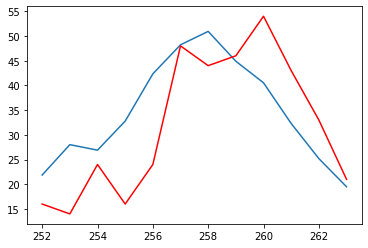

In [219]:
# Plot the prediction vs test data
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

In [220]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(test_data, pred)))


10.271014466414943


### Save model

In [185]:
ar_model.save('ar_model_2020_12.pickle')

In [162]:
from statsmodels.tsa.ar_model import AutoRegResultsWrapper

In [191]:
# Try to reload save models and make prediction
new_results = AutoRegResultsWrapper.load("ar_model_2020_12.pickle")
type(new_results)

statsmodels.tsa.ar_model.AutoRegResultsWrapper

In [192]:
new_results.predict(start=264, end=265, dynamic=False)

264    24.730163
265    28.257396
dtype: float64

## ARMA

### Training

In [193]:
from statsmodels.tsa.arima.model import ARIMA
model_arma = ARIMA(endog = train_data, \
                   order = (12, 0, 12))
# endog: dependent variable, response variable or y (endogenous)
# order: order of the model for the autoregressive, 
#        differences & moving average components.
fit_arma = model_arma.fit()
print("Coefficients:\n%s" % fit_arma.params)

/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Coefficients:
const     43.761327
ar.L1     -0.453562
ar.L2     -0.300305
ar.L3      0.035141
ar.L4      0.444494
ar.L5      0.284186
ar.L6     -0.018311
ar.L7     -0.422787
ar.L8     -0.337106
ar.L9      0.063348
ar.L10     0.356188
ar.L11     0.504366
ar.L12     0.826816
ma.L1      0.643361
ma.L2      0.536394
ma.L3      0.270368
ma.L4     -0.206856
ma.L5     -0.086165
ma.L6      0.063001
ma.L7      0.546189
ma.L8      0.472056
ma.L9      0.189811
ma.L10    -0.031134
ma.L11    -0.379863
ma.L12    -0.509036
sigma2    72.291342
dtype: float64


/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Evaluate

In [194]:
# Make the predictions
pred = fit_arma.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

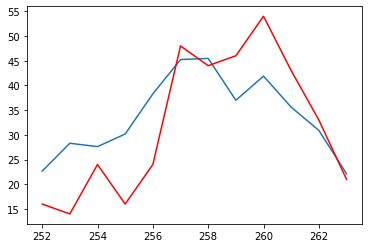

In [195]:
#
# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

In [196]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(test_data, pred)))


8.968876748832997


### Save model

In [212]:
fit_arma.save('arma_model_2020_12.pickle')

In [214]:
from statsmodels.tsa.arima.model import ARIMAResultsWrapper

In [215]:
# Try to reload save models and make prediction
loaded_model = ARIMAResultsWrapper.load("arma_model_2020_12.pickle")
type(loaded_model)

statsmodels.tsa.arima.model.ARIMAResultsWrapper

In [216]:
loaded_model.predict(start=264, end=265, dynamic=False)

264    23.722268
265    27.520678
Name: predicted_mean, dtype: float64

## Porphet

### Training

In [197]:
from prophet import Prophet

In [198]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,MONTH
0,Alkoholunfälle,insgesamt,2000,200001,78.0,NaN,NaN,NaN,78.0,2000-01-01
1,Alkoholunfälle,insgesamt,2000,200002,53.0,NaN,-32.05,NaN,66.0,2000-02-01
2,Alkoholunfälle,insgesamt,2000,200003,73.0,NaN,37.74,NaN,68.0,2000-03-01
3,Alkoholunfälle,insgesamt,2000,200004,78.0,NaN,6.85,NaN,71.0,2000-04-01
4,Alkoholunfälle,insgesamt,2000,200005,96.0,NaN,23.08,NaN,76.0,2000-05-01


In [199]:
df2 = df[['MONTH', 'WERT']]
df2.columns = ['ds', 'y']

In [200]:
train_data = df2[:len(df)-12]
test_data = df2[len(df)-12:]

In [201]:
m = Prophet()
m.fit(train_data)

08:54:59 - cmdstanpy - INFO - Chain [1] start processing
08:55:00 - cmdstanpy - INFO - Chain [1] done processing


### Evaluate

In [202]:
future = test_data[['ds']]
future.tail()

,ds
259,2021-08-01
260,2021-09-01
261,2021-10-01
262,2021-11-01
263,2021-12-01


In [203]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,32.829353,11.759773,31.342699,32.829353,32.829353,-11.074894,-11.074894,-11.074894,-11.074894,-11.074894,-11.074894,0.0,0.0,0.0,21.754459
1,2021-02-01,32.829523,12.346605,31.381548,32.829523,32.829523,-10.983268,-10.983268,-10.983268,-10.983268,-10.983268,-10.983268,0.0,0.0,0.0,21.846256
2,2021-03-01,32.829678,14.212027,34.386064,32.826688,32.833530,-8.011021,-8.011021,-8.011021,-8.011021,-8.011021,-8.011021,0.0,0.0,0.0,24.818657
3,2021-04-01,32.829849,18.720083,38.979024,32.819493,32.842391,-4.466797,-4.466797,-4.466797,-4.466797,-4.466797,-4.466797,0.0,0.0,0.0,28.363052
4,2021-05-01,32.830014,29.452397,48.499813,32.810812,32.853866,6.372872,6.372872,6.372872,6.372872,6.372872,6.372872,0.0,0.0,0.0,39.202886


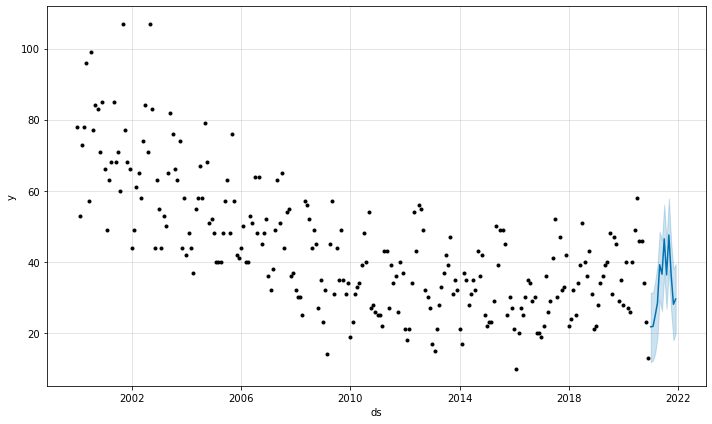

In [204]:
fig1 = m.plot(forecast)


In [205]:
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(test_data['y'], forecast['yhat'])))


8.617811255999623


# Grid search
- I decided to go for AR, ARMA because they have not bad RMSE, plus simplicity and high explainability
- Now grid search for some hyper params

## Auto Regression model

In [221]:
for lag in [6, 12, 18, 24]:
    ar_model = AutoReg(train_data, lags=lag).fit()
    pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
    print("Lag ", lag, math.sqrt(mean_squared_error(test_data, pred)))


Lag  6 11.204944116549223
Lag  12 10.271014466414943
Lag  18 11.013690552853783
Lag  24 10.239429062574605


## ARMA model

In [224]:
from statsmodels.tsa.arima.model import ARIMA
for lag in [6, 12, 24]:
    for ma_lag in [6, 12, 24]:
        model_arma = ARIMA(endog = train_data, order = (lag, 0, ma_lag))
        model_arma = model_arma.fit()
        # Make the predictions
        pred = model_arma.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
        print(f"Lag {lag}, ma_lag {ma_lag}", math.sqrt(mean_squared_error(test_data, pred)))


/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lag 6, ma_lag 6 9.297222626573769


/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lag 6, ma_lag 12 9.670853042858065


/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lag 6, ma_lag 24 7.682160071871193


/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as

Lag 12, ma_lag 6 9.81836926769033


/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lag 12, ma_lag 12 8.968876748832997


/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lag 12, ma_lag 24 11.802460190807608


/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Lag 24, ma_lag 6 10.264905258827104


/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lag 24, ma_lag 12 10.715365832344474


/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lag 24, ma_lag 24 9.601877833208091


## Pick best model
- ARMA with p=6 and q=24 is pick
- Let's see how it work

In [225]:
from statsmodels.tsa.arima.model import ARIMA
model_arma = ARIMA(endog = train_data, \
                   order = (6, 0, 24))
# endog: dependent variable, response variable or y (endogenous)
# order: order of the model for the autoregressive, 
#        differences & moving average components.
fit_arma = model_arma.fit()
print("Coefficients:\n%s" % fit_arma.params)

Coefficients:
const     43.785766
ar.L1      0.736486
ar.L2      0.720206
ar.L3     -0.056336
ar.L4     -0.650538
ar.L5     -0.665398
ar.L6      0.912771
ma.L1     -0.499847
ma.L2     -0.748634
ma.L3     -0.075827
ma.L4      0.573855
ma.L5      0.759434
ma.L6     -0.898313
ma.L7     -0.003978
ma.L8      0.046115
ma.L9      0.008323
ma.L10     0.121712
ma.L11    -0.162602
ma.L12     0.149062
ma.L13    -0.250122
ma.L14     0.132853
ma.L15     0.155014
ma.L16     0.164721
ma.L17    -0.126501
ma.L18    -0.527092
ma.L19     0.118537
ma.L20     0.306884
ma.L21     0.478345
ma.L22    -0.270631
ma.L23    -0.313068
ma.L24     0.160535
sigma2    70.782744
dtype: float64


/Users/cuonghn/opt/miniconda3/envs/visualize/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Evaluate

In [226]:
# Make the predictions
pred = fit_arma.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

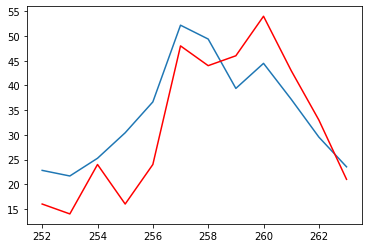

In [227]:
#
# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

In [228]:
print(math.sqrt(mean_squared_error(test_data, pred)))

7.682160071871193


### Save model

In [229]:
fit_arma.save('arma_model_2020_12_p6_q24.pickle')

In [230]:
from statsmodels.tsa.arima.model import ARIMAResultsWrapper

In [231]:
# Try to reload save models and make prediction
loaded_model = ARIMAResultsWrapper.load("arma_model_2020_12_p6_q24.pickle")
type(loaded_model)

statsmodels.tsa.arima.model.ARIMAResultsWrapper

In [232]:
loaded_model.predict(start=264, end=265, dynamic=False)

264    22.087494
265    16.875526
Name: predicted_mean, dtype: float64